In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import scipy
from datetime import datetime

from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn import svm


In [2]:
df_matches_male_players = pd.read_csv("../data/integrations/df_male_classification.csv")
df_matches_female_players = pd.read_csv("../data/integrations/df_female_classification.csv")

Assign to players without rank, the maximum rank in the dataset

In [3]:
df_matches_male_players = df_matches_male_players[df_matches_male_players['avg_rank'].notna()].reset_index()

Use box plot to set a threshold in order to discriminite weak players and strong ones.

In [4]:
fig = px.box(df_matches_male_players['avg_rank'], y='avg_rank')
fig.show()

Assign labels using the following rules:
- above median value the player is labeled as weak
- below medin value the player is labeled as strong

In [5]:
df_matches_male_players.loc[df_matches_male_players['avg_rank'] > 569, 'label'] = 1
df_matches_male_players.loc[df_matches_male_players['avg_rank'] <= 569, 'label'] = 0
df_male_classification = df_matches_male_players[['IOC','Won_Tournaments','Number_of_Matches', 'Win_Percentage', 'label']]

In [ ]:
df_male_classification

,IOC,Won_Tournaments,Number_of_Matches,Win_Percentage,label
0,GER,17.0,378.0,0.706349,0.0
1,USA,0.0,7.0,0.285714,1.0
2,GER,0.0,11.0,0.454545,1.0
3,GRE,0.0,4.0,0.250000,1.0
4,ESP,0.0,94.0,0.500000,0.0
...,...,...,...,...,...
1475,AUT,0.0,4.0,0.500000,1.0
1476,POL,0.0,2.0,0.500000,1.0
1477,FRA,0.0,2.0,0.500000,1.0
1478,ITA,0.0,4.0,0.500000,1.0


One hot encoding IOC:

In [10]:
le = preprocessing.LabelEncoder()
le.fit(df_male_classification['IOC'])
df_male_classification['IOC'] = le.transform(df_male_classification['IOC'])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
#save df_male_classification
df_male_classification.to_csv("../data/df_male_classification.csv", index=False)

Split training and test

In [ ]:
X = np.array(df_male_classification.drop(columns = ['label']))
y = np.array(df_male_classification['label'])
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

## KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=3)
neigh.fit(X_train, y_train, )
neigh.score(X_test, y_test)

0.8783783783783784

## Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',learning_rate= 'adaptive', alpha=2e-5, hidden_layer_sizes=(10, 20), random_state=1, validation_fraction=0.25, early_stopping=True, max_iter=400)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



0.8837837837837837

## Decision Tree

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=1, max_features=4)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8810810810810811

[Text(167.4, 163.07999999999998, 'X[2] <= -0.476\ngini = 0.5\nsamples = 1110\nvalue = [551, 559]'),
 Text(83.7, 54.360000000000014, 'gini = 0.252\nsamples = 596\nvalue = [88, 508]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.179\nsamples = 514\nvalue = [463, 51]')]

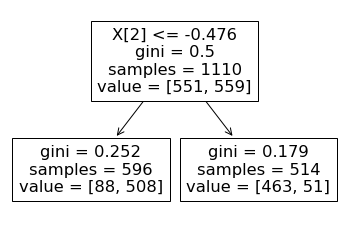

In [ ]:
tree.plot_tree(clf)

## SVM

In [ ]:

clf = svm.SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8864864864864865

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=de87b132-0371-4d99-94f9-c61923e2507d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>